In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
def sliding_window(data_array, window=2):  
    length = len(data_array)
    new_list = []  
    for i in range(length):  
        indices = range(max(i - window, 0),  
                        min(i + window + 1, length))  
        avg = 0  
        for j in indices:  
            avg += data_array[j]  
        avg /= float(len(indices))  
        new_list.append(avg)  
          
    return np.array(new_list)

In [4]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter,MaxNLocator

In [5]:
plt.rcParams['xtick.major.pad'] = 12
plt.rcParams['ytick.major.pad'] = 12
plt.rcParams.update({'font.size': 10})

In [6]:
colors = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
for i in range(len(colors)):    
    r, g, b = colors[i]    
    colors[i] = (r / 255., g / 255., b / 255.) 

In [7]:
def setPlotProps(ax,percent=True):
    majorLocator = MultipleLocator(5)
    majorFormatter = FormatStrFormatter('%.1f %%')
    if not percent:
        majorFormatter = FormatStrFormatter('%d')
    ax.xaxis.set_major_locator(majorLocator)
    xlabels = ax.get_xticklabels()
    plt.setp(xlabels[1:], fontsize=11)
    ax.yaxis.set_major_formatter(majorFormatter)
    ylabels = ax.get_yticklabels()
    plt.setp(ylabels, fontsize=11)
    ax.yaxis.grid(b=True, which='major', color='gray', linestyle=':',linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()    
    plt.xlabel('Year', fontsize=12,labelpad=12)

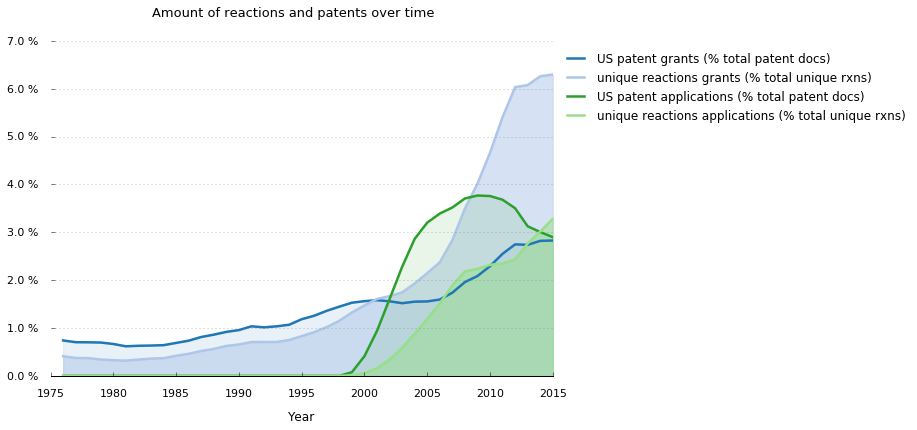

In [8]:
data = pd.DataFrame.from_csv('AmountRXNPatentsApplicationsOverTime.csv')
names=list(data)
years=np.array(data[names[0]])

fig, ax = plt.subplots(figsize=(9,6),dpi=300)
count=0
for k in names[1:]:
    occ=np.array(data[k])
    a=0.5
    if not count%2:
        a=0.1
    plt.plot(years,sliding_window(occ),label=k,linewidth=2.5,color=colors[count])
    plt.fill_between(years,0,sliding_window(occ),color=colors[count],alpha=a)
    if not count%2:
        count+=1
    else:
        count+=3
    setPlotProps(ax)
    lgd=plt.legend(bbox_to_anchor=(1, 1), loc=2,frameon=False)
    plt.setp(plt.gca().get_legend().get_texts(), fontsize=12)
    ttl=fig.suptitle('Amount of reactions and patents over time', fontsize=13)

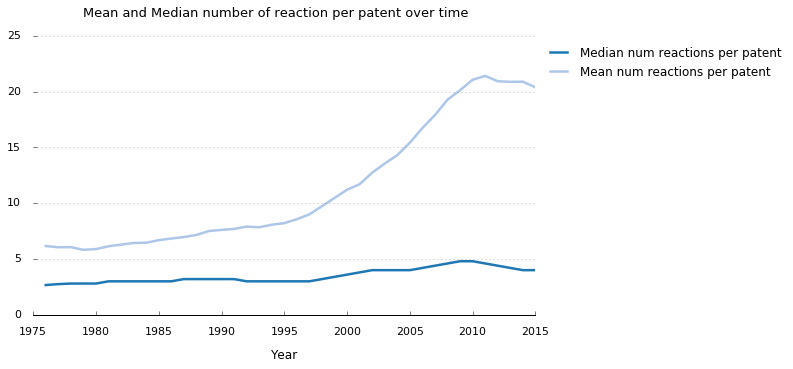

In [9]:
data = pd.DataFrame.from_csv('MedianMeanNumRxnPerPatentOverTime.csv')
names=list(data)
years=np.array(data[names[0]])

fig, ax = plt.subplots(figsize=(9,5),dpi=300)
for i,k in enumerate(names[1:]):
    occ=np.array(data[k])
    plt.plot(years,sliding_window(occ),label=k,linewidth=2.5,color=colors[i])
    setPlotProps(ax,percent=False)
    lgd=plt.legend(bbox_to_anchor=(1, 1), loc=2,frameon=False)
    plt.setp(plt.gca().get_legend().get_texts(), fontsize=12)
    ttl=fig.suptitle('Mean and Median number of reaction per patent over time', fontsize=13)

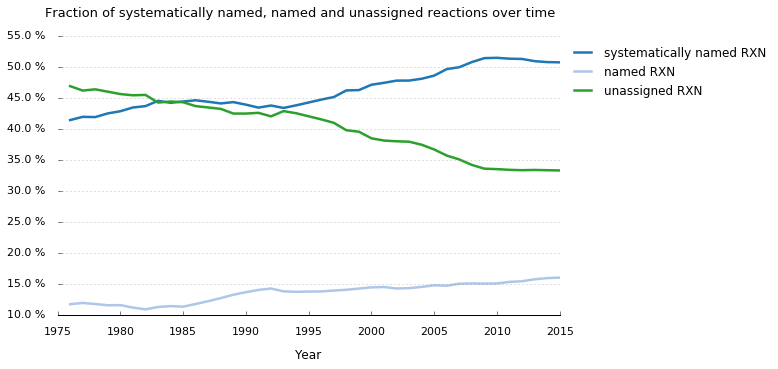

In [10]:
data = pd.DataFrame.from_csv('UnassignedNamedReactionsOverTime.csv')
names=list(data)
years=np.array(data[names[0]])

fig, ax = plt.subplots(figsize=(9,5),dpi=300)
count=0
for k in names[1:]:
    occ=np.array(data[k])
    plt.plot(years,sliding_window(occ),label=k,linewidth=2.5,color=colors[count])
    if not count%2:
        count+=1
    else:
        count+=3
    setPlotProps(ax)
    lgd=plt.legend(bbox_to_anchor=(1, 1), loc=2,frameon=False)
    plt.setp(plt.gca().get_legend().get_texts(), fontsize=12)
    ttl=fig.suptitle('Fraction of systematically named, named and unassigned reactions over time', fontsize=13)

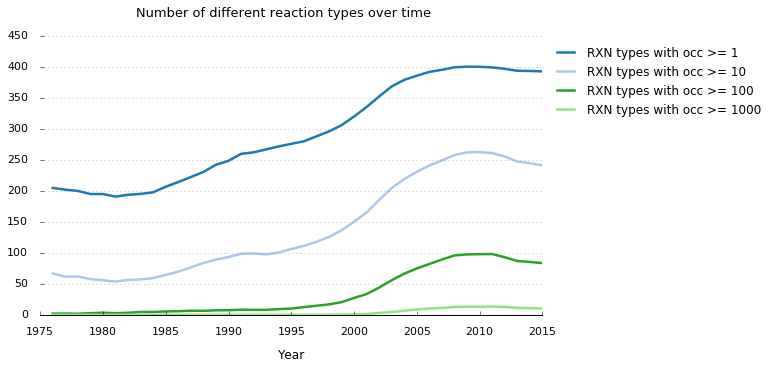

In [11]:
data = pd.DataFrame.from_csv('NumberRXNTypesOverTime.csv')
names=list(data)
years=np.array(data[names[0]])

fig, ax = plt.subplots(figsize=(9,5),dpi=300)
count=0
for k in names[1:]:
    occ=np.array(data[k])
    plt.plot(years,sliding_window(occ),label=k,linewidth=2.5,color=colors[count])
    if not count%2:
        count+=1
    else:
        count+=3
    setPlotProps(ax,percent=False)
    lgd=plt.legend(bbox_to_anchor=(1, 1), loc=2,frameon=False)
    plt.setp(plt.gca().get_legend().get_texts(), fontsize=12)
    ttl=fig.suptitle('Number of different reaction types over time', fontsize=13)

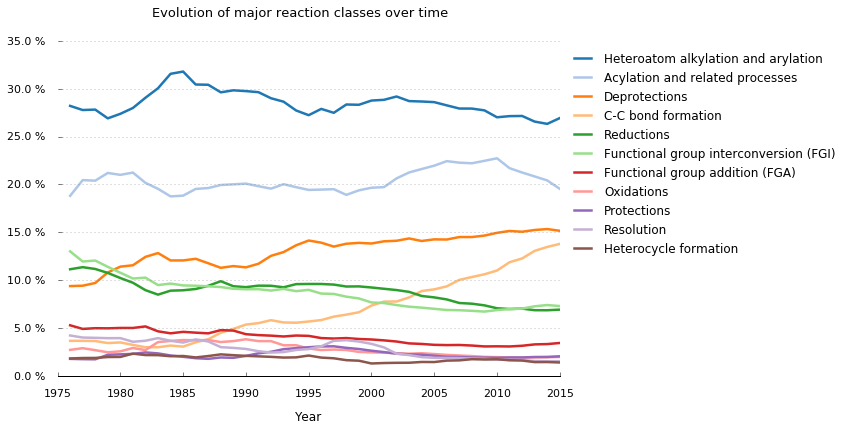

In [12]:
data = pd.DataFrame.from_csv('EvolutionMajorRXNClassesOverTime.csv')
names=list(data)
years=np.array(data[names[0]])

fig, ax = plt.subplots(figsize=(9,6),dpi=300)
for i,k in enumerate(names[1:]):
    occ=np.array(data[k])
    plt.plot(years,sliding_window(occ),label=k,linewidth=2.5,color=colors[i])
    setPlotProps(ax)
    lgd=plt.legend(bbox_to_anchor=(1, 1), loc=2,frameon=False)
    plt.setp(plt.gca().get_legend().get_texts(), fontsize=12)
    ttl=fig.suptitle('Evolution of major reaction classes over time', fontsize=13)

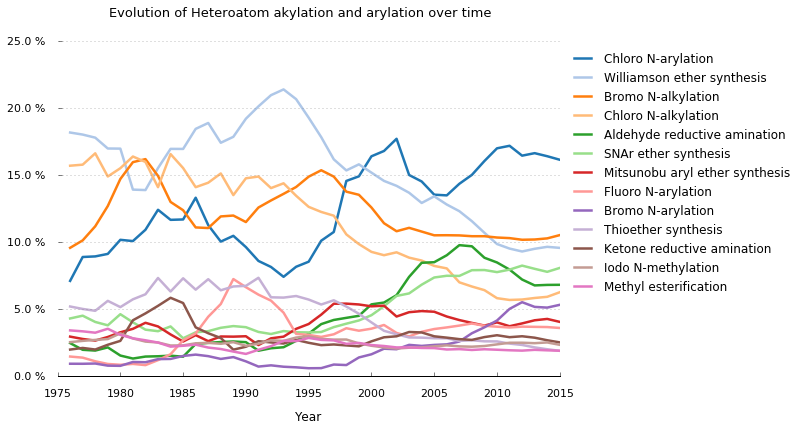

In [13]:
data = pd.DataFrame.from_csv('Heteroatom_alkylation_and_arylation_RXNTypesOverTime.csv')
names=list(data)
years=np.array(data[names[0]])

fig, ax = plt.subplots(figsize=(9,6),dpi=300)
for i,k in enumerate(names[1:]):
    occ=np.array(data[k])
    plt.plot(years,sliding_window(occ, window=2),label=k,linewidth=2.5,color=colors[i])
    setPlotProps(ax)
    lgd=plt.legend(bbox_to_anchor=(1, 1), loc=2,frameon=False)
    plt.setp(plt.gca().get_legend().get_texts(), fontsize=12)
    ttl=fig.suptitle('Evolution of Heteroatom akylation and arylation over time', fontsize=13)

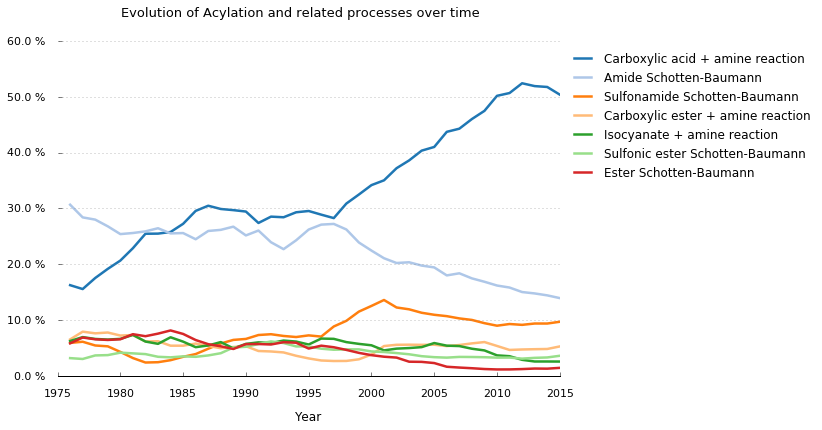

In [14]:
data = pd.DataFrame.from_csv('Acylation_and_related_processes_RXNTypesOverTime.csv')
names=list(data)
years=np.array(data[names[0]])

fig, ax = plt.subplots(figsize=(9,6),dpi=300)
for i,k in enumerate(names[1:]):
    occ=np.array(data[k])
    plt.plot(years,sliding_window(occ, window=2),label=k,linewidth=2.5,color=colors[i])
    setPlotProps(ax)
    lgd=plt.legend(bbox_to_anchor=(1, 1), loc=2,frameon=False)
    plt.setp(plt.gca().get_legend().get_texts(), fontsize=12)
    ttl=fig.suptitle('Evolution of Acylation and related processes over time', fontsize=13)

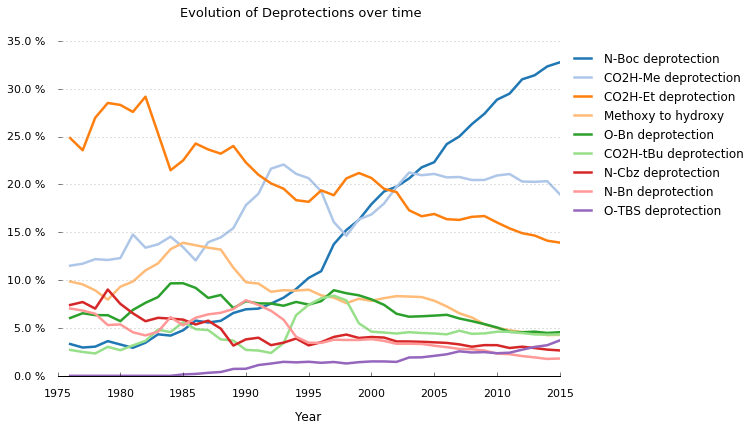

In [15]:
data = pd.DataFrame.from_csv('Deprotections_RXNTypesOverTime.csv')
names=list(data)
years=np.array(data[names[0]])

fig, ax = plt.subplots(figsize=(9,6),dpi=300)
for i,k in enumerate(names[1:]):
    occ=np.array(data[k])
    plt.plot(years,sliding_window(occ, window=2),label=k,linewidth=2.5,color=colors[i])
    setPlotProps(ax)
    lgd=plt.legend(bbox_to_anchor=(1, 1), loc=2,frameon=False)
    plt.setp(plt.gca().get_legend().get_texts(), fontsize=12)
    ttl=fig.suptitle('Evolution of Deprotections over time', fontsize=13)

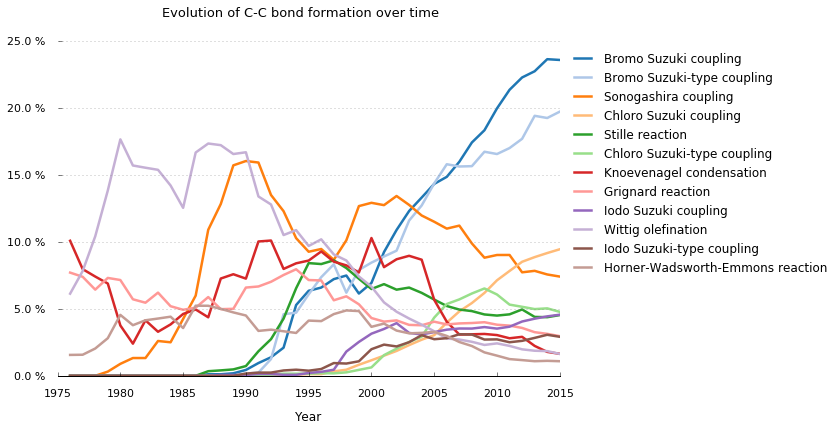

In [16]:
data = pd.DataFrame.from_csv('C-C_bond_formation_RXNTypesOverTime.csv')
names=list(data)
years=np.array(data[names[0]])

fig, ax = plt.subplots(figsize=(9,6),dpi=300)
for i,k in enumerate(names[1:]):
    occ=np.array(data[k])
    plt.plot(years,sliding_window(occ, window=2),label=k,linewidth=2.5,color=colors[i])
    setPlotProps(ax)
    lgd=plt.legend(bbox_to_anchor=(1, 1), loc=2,frameon=False)
    plt.setp(plt.gca().get_legend().get_texts(), fontsize=12)
    ttl=fig.suptitle('Evolution of C-C bond formation over time', fontsize=13)

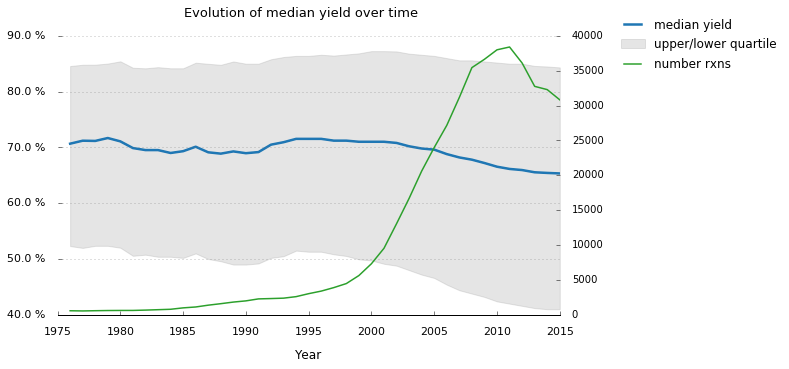

In [17]:
data = pd.DataFrame.from_csv('EvolutionYieldOverTime.csv')
names=list(data)
years=np.array(data[names[0]])

fig, ax = plt.subplots(figsize=(9,5),dpi=300)
median=sliding_window(np.array(data[names[1]]))
plt.plot(years,median,label=names[1],linewidth=2.5,color=colors[0])
upper=sliding_window(np.array(data[names[2]]))
lower=sliding_window(np.array(data[names[3]]))
ax.plot(years,median,linewidth=0.8,color=colors[0])
ax.plot(years,median,linewidth=0.8,color=colors[0])
ax.fill_between(years,lower,upper,label='upper/lower quartile',color="gray",alpha=0.2)
setPlotProps(ax)

ax2 = ax.twinx()
occ=sliding_window(np.array(data[names[4]]))
ax2.plot(years,occ,label=names[4],linewidth=1.5,color=colors[4])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.get_xaxis().tick_bottom()    
ax2.get_yaxis().tick_right()

lgd=ax.legend(bbox_to_anchor=(1.1, 1.1), loc=2,frameon=False)
lgd2=ax2.legend(bbox_to_anchor=(1.1, 0.96), loc=2,frameon=False)
plt.setp(plt.gca().get_legend().get_texts(), fontsize=12)
ttl=fig.suptitle('Evolution of median yield over time', fontsize=13)

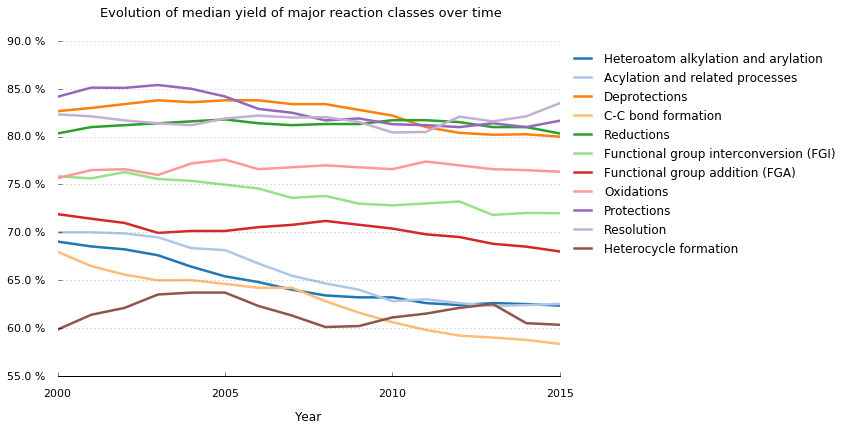

In [18]:
data = pd.DataFrame.from_csv('YieldMajorRXNClsOverTime.csv')
names=list(data)
years=np.array(data[names[0]])

fig, ax = plt.subplots(figsize=(9,6),dpi=300)
for i,k in enumerate(names[1:]):
    occ=np.array(data[k])
    plt.plot(years,sliding_window(occ),label=k,linewidth=2.5,color=colors[i])
    setPlotProps(ax)
    lgd=plt.legend(bbox_to_anchor=(1, 1), loc=2,frameon=False)
    plt.setp(plt.gca().get_legend().get_texts(), fontsize=12)
    ttl=fig.suptitle('Evolution of median yield of major reaction classes over time', fontsize=13)

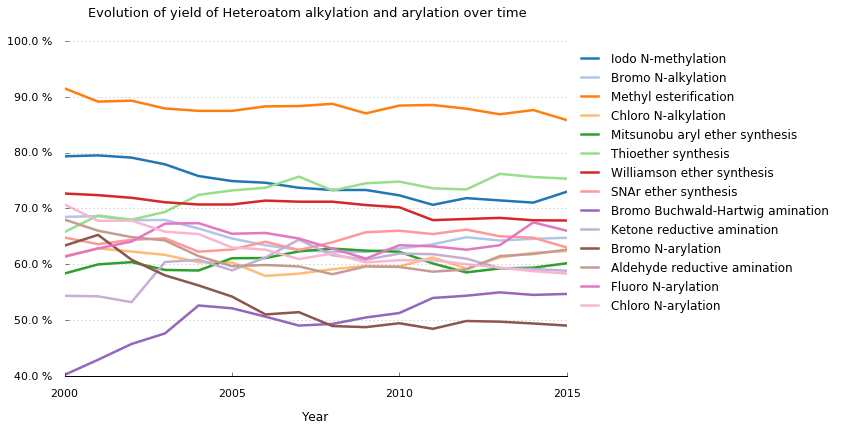

In [19]:
data = pd.DataFrame.from_csv('YieldHeteroatomAlkylationOverTime.csv')
names=list(data)
years=np.array(data[names[0]])

fig, ax = plt.subplots(figsize=(9,6),dpi=300)
for i,k in enumerate(names[1:]):
    occ=np.array(data[k])
    plt.plot(years,sliding_window(occ),label=k,linewidth=2.5,color=colors[i])
    setPlotProps(ax)
    lgd=plt.legend(bbox_to_anchor=(1, 1), loc=2,frameon=False)
    plt.setp(plt.gca().get_legend().get_texts(), fontsize=12)
    ttl=fig.suptitle('Evolution of yield of Heteroatom alkylation and arylation over time', fontsize=13)

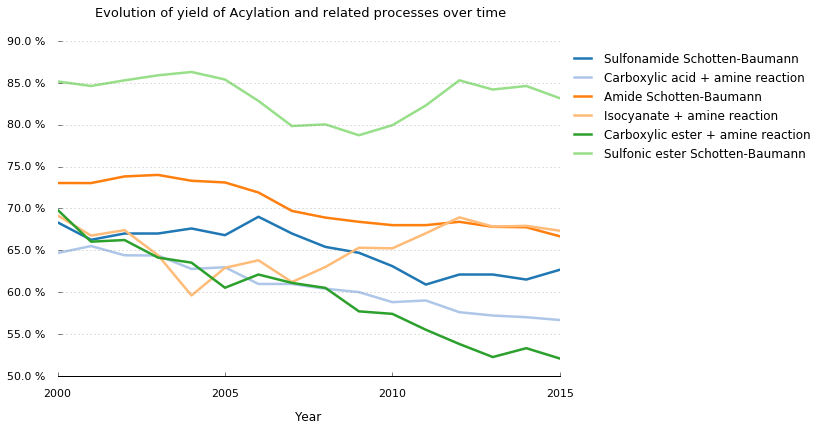

In [20]:
data = pd.DataFrame.from_csv('YieldAcylationOverTime.csv')
names=list(data)
years=np.array(data[names[0]])

fig, ax = plt.subplots(figsize=(9,6),dpi=300)
for i,k in enumerate(names[1:]):
    occ=np.array(data[k])
    plt.plot(years,sliding_window(occ),label=k,linewidth=2.5,color=colors[i])
    setPlotProps(ax)
    lgd=plt.legend(bbox_to_anchor=(1, 1), loc=2,frameon=False)
    plt.setp(plt.gca().get_legend().get_texts(), fontsize=12)
    ttl=fig.suptitle('Evolution of yield of Acylation and related processes over time', fontsize=13)

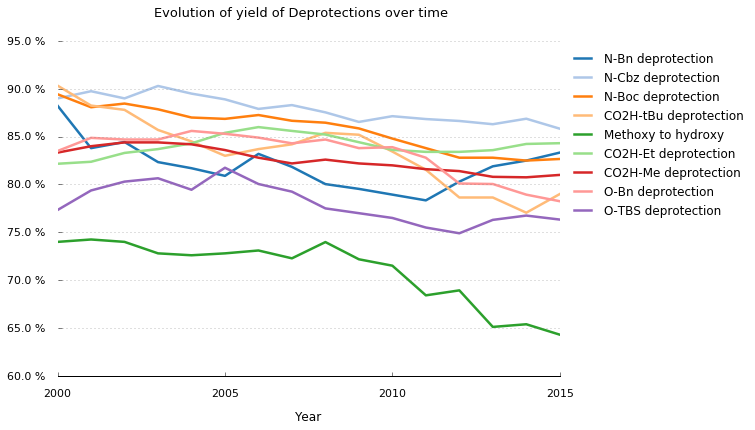

In [21]:
data = pd.DataFrame.from_csv('YieldDeprotectionOverTime.csv')
names=list(data)
years=np.array(data[names[0]])

fig, ax = plt.subplots(figsize=(9,6),dpi=300)
for i,k in enumerate(names[1:]):
    occ=np.array(data[k])
    plt.plot(years,sliding_window(occ),label=k,linewidth=2.5,color=colors[i])
    setPlotProps(ax)
    lgd=plt.legend(bbox_to_anchor=(1, 1), loc=2,frameon=False)
    plt.setp(plt.gca().get_legend().get_texts(), fontsize=12)
    ttl=fig.suptitle('Evolution of yield of Deprotections over time', fontsize=13)

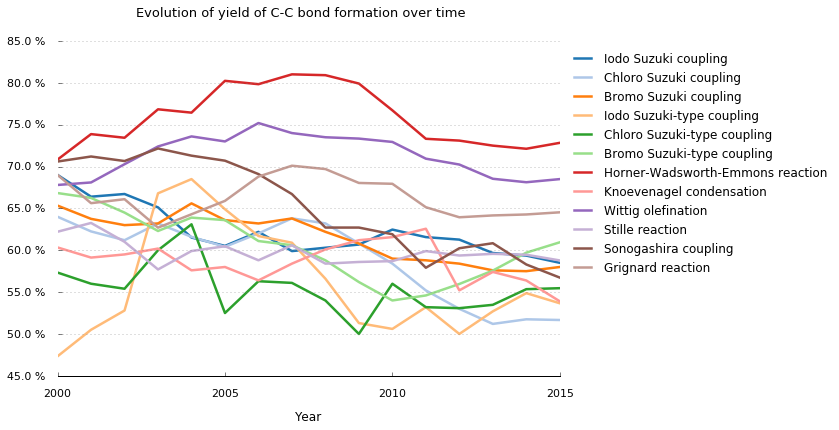

In [22]:
data = pd.DataFrame.from_csv('YieldCCBondFormationOverTime.csv')
names=list(data)
years=np.array(data[names[0]])

fig, ax = plt.subplots(figsize=(9,6),dpi=300)
for i,k in enumerate(names[1:]):
    occ=np.array(data[k])
    plt.plot(years,sliding_window(occ),label=k,linewidth=2.5,color=colors[i])
    setPlotProps(ax)
    lgd=plt.legend(bbox_to_anchor=(1, 1), loc=2,frameon=False)
    plt.setp(plt.gca().get_legend().get_texts(), fontsize=12)
    ttl=fig.suptitle('Evolution of yield of C-C bond formation over time', fontsize=13)